Deleting Corrupt files:

In [10]:
import os
import PyPDF2

def check_and_delete_unreadable_pdfs(folder_path):
    """
    Checks if PDF files in the given folder are readable.
    Deletes the unreadable ones.
    """
    for file in os.listdir(folder_path):
        if file.lower().endswith(".pdf"):
            file_path = os.path.join(folder_path, file)
            try:
                with open(file_path, "rb") as f:
                    reader = PyPDF2.PdfReader(f)
                    # If the PDF has pages, it's readable
                    if len(reader.pages) > 0:
                        print(f" {file} is readable.")
                    else:
                        print(f" {file} is unreadable (empty or corrupt). Deleting...")
                        os.remove(file_path)
            except Exception as e:
                print(f" {file} is unreadable ({str(e)}). Deleting...")
                os.remove(file_path)


check_and_delete_unreadable_pdfs("sample test")

 A-Guide-to-Fundamental-Analysis-in-Crypto.pdf is readable.
 a-new-era-for-bitcoin.pdf is readable.
 a-primer-on-account-abstraction.pdf is readable.
 a-primer-on-on-chain-gaming.pdf is readable.
 AI-Crypto-Exploring-Use-Cases-and-Possibilities-.pdf is readable.
 ai-inference-agent-service.pdf is readable.
 ai-x-crypto-latest-data-and-developments.pdf is readable.
 Algorithmic_Stablecoin_Stefan_Piech.pdf is readable.
 Aptos_Sui_Report_Shivam_Sharma.pdf is readable.
 archway-technical-paper.pdf is readable.
 archway-whitepaper.pdf is readable.
 ArdorFees.pdf is readable.
 arweave-lightpaper.pdf is readable.
 au-treasury-cp-regulating-digital-asset-2023.pdf is readable.
 autonomys-lightpaper.pdf is readable.
 b0162447829a41b36d35d371b4299c9ff09d9785.pdf is readable.
 b06a5bb534ba250950768fbea77abaa70b20c223.pdf is readable.
 b198b3fbd4d79b64c74959ab69b0dd9e2ec807d6.pdf is readable.
 b1db988056b0eb4ac288f0ab20249f61564298c4.pdf is readable.
 b294e71f559060fac34a940a5e4dd10dd1974bdd.pdf is

In [24]:
import os
import pdfplumber

def extract_text_from_pdfs_in_folder(folder_path):
    """Extracts and stores text from all PDFs in a folder into a list using pdfplumber."""
    all_texts = []  # List to store text of each PDF

    # Iterate over all PDF files in the folder
    for file in os.listdir(folder_path):
        if file.lower().endswith(".pdf"):
            file_path = os.path.join(folder_path, file)

            try:
                with pdfplumber.open(file_path) as pdf:
                    pdf_text = ""  # Temporary string for current PDF's content
                    for page in pdf.pages:
                        pdf_text += page.extract_text() or ""  # Append text from each page
                    
                    # Add the text of the current PDF to the list
                    all_texts.append(pdf_text.strip())  # .strip() removes leading/trailing spaces
            except Exception as e:
                print(f"❌ Error reading {file}: {str(e)}")

    return all_texts


In [25]:
pdf_content = extract_text_from_pdfs_in_folder("sample test")

In [26]:
pdf_content[0][:1000]

'A Guide to Fundamental Analysis in Crypto\nTable of Contents\nKey Takeaways 3\nIntroduction 4\nWhy do Fundamentals Matter? 5\nWhat to Look Out for? 7\nDemand and Supply 7\nFinancial Performance 8\nValuation 9\nTokenomics 10\nStakeholder Engagement 11\nFundamental Analysis in Action 12\nEcosystem Overview - Top dApps 13\nBy Fees 13\nBy Revenue 13\nBy Earnings 14\nBy Daily Active Users 15\nBy Developers 16\nCase Studies: Understanding Business Models 17\nNFT Marketplace - OpenSea 17\nDecentralized Exchange - Uniswap 18\nLiquid Staking - Lido 20\nValuation 22\nClosing Thoughts 23\nReferences 24\n2A Guide to Fundamental Analysis in Crypto\nKey Takeaways\n❖ Fundamental analysis refers to the method of assessing the intrinsic value of projects\nand tokens by analyzing various economic, financial, qualitative, and quantitative\nfactors.\n❖ A non-exhaustive list of factors such as the demand and supply dynamics, financial\nperformance, valuation, tokenomics, and stakeholder engagement form th

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(pdf_content, columns=['content'])

In [32]:
df.head()

,content
0,A Guide to Fundamental Analysis in Crypto\nTab...
1,ANewEraforBitcoin?\nTable of Contents\nKeyTake...
2,Table of Contents\nKey Takeaways 2\nOverview 3...
3,A Primer on\nOn-Chain Gaming\nDecember 2023\nN...
4,AIxCrypto:ExploringUseCasesandPossibilities\nT...


Calculate the length of each document's text and plot the histogram

In [33]:
df['text_length'] = df['content'].str.len()

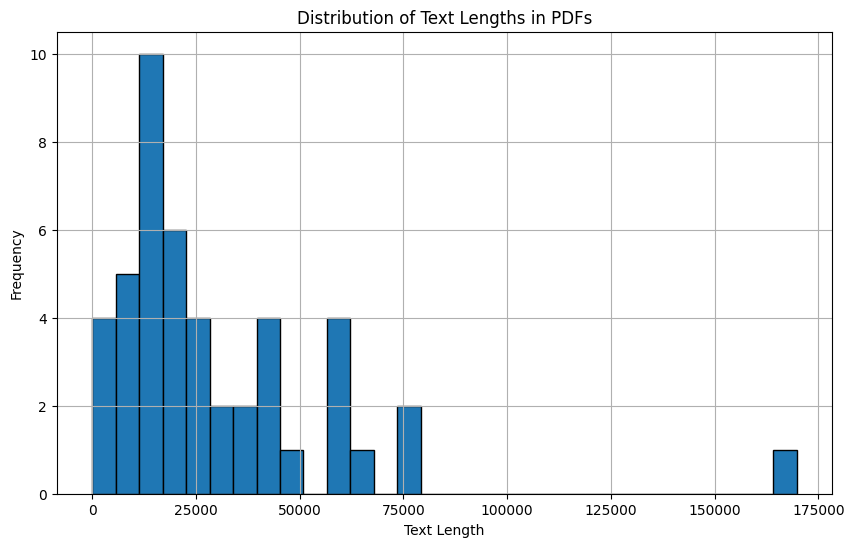

In [34]:
plt.figure(figsize=(10, 6))
df['text_length'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Text Lengths in PDFs')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Mega
[nltk_data]     Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
def preprocess_text(text):
    if pd.isna(text):  # Handle missing values
        return ""
    
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    #text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text.lower())  # Tokenization & lowercasing
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

# Apply preprocessing to df["content"]
df["cleaned_content"] = df["content"].apply(preprocess_text)

Top words Used:

Total Words: 94385
Unique Words: 19149


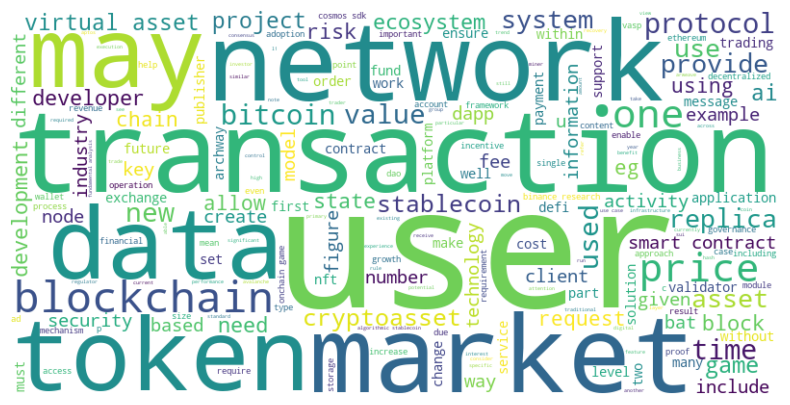

In [43]:
cleaned_text=""
cleaned_text = " ".join(df["cleaned_content"].dropna())
from wordcloud import WordCloud

print("Total Words:", len(cleaned_text.split()))
print("Unique Words:", len(set(cleaned_text.split())))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(cleaned_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Subjectivity analysis:

In [48]:
from textblob import TextBlob
def classify_subjectivity(text): 
    subjectivity_score = TextBlob(text).sentiment.subjectivity
    
    return "Subjective" if subjectivity_score > 0.5 else "Objective"
# Apply function to classify subjectivity and append to DataFrame
df["subjectivity"] = df["cleaned_content"].apply(classify_subjectivity)


In [49]:
df["subjectivity"].value_counts()

subjectivity
Objective     30
Subjective    16
Name: count, dtype: int64

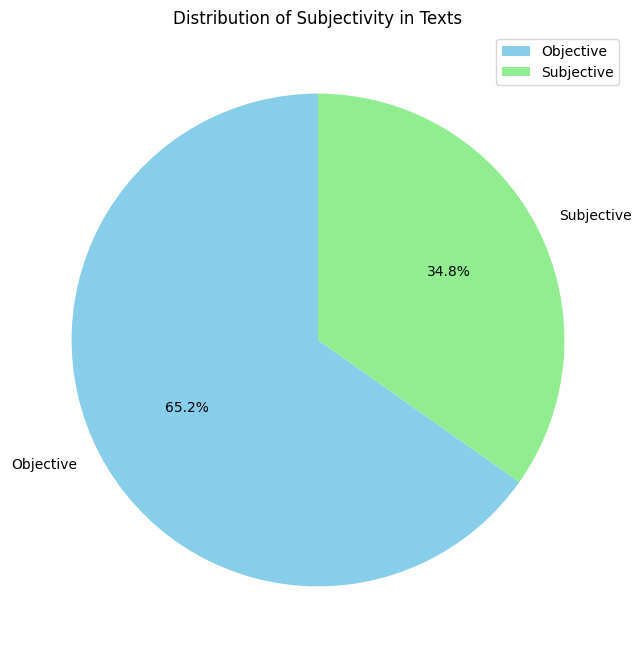

In [50]:
plt.figure(figsize=(8, 8))
df["subjectivity"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=90, legend=True)

# Add title and show the plot
plt.title('Distribution of Subjectivity in Texts')
plt.ylabel('') 
plt.show()
